# #1

1. Read datasets to create dataframe
2. Do basic EDA create plots as you think useful to get insights of the data
3. Normalize data using slandered and min max scaler if needed
4. Do regression using different regression algorithms (price is target )
5. Print accuracy score of each.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## read dataset

In [2]:
df = pd.read_csv("ParisHousing.csv")
df1 = df.head(50)
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
# sns.barplot(x='numberOfRooms',y='price',data=df)

In [4]:
df.shape

(10000, 17)

In [5]:
df.columns


Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

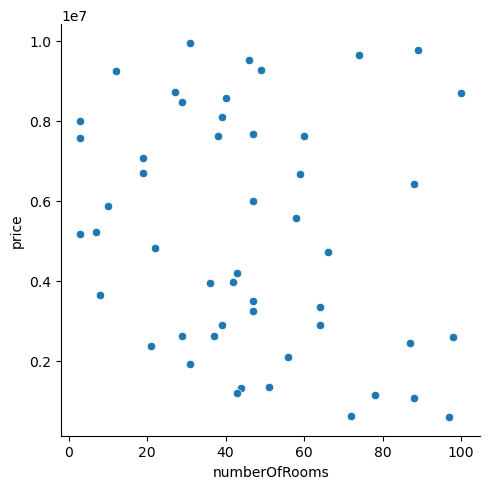

In [6]:
sns.relplot(data=df1, x="numberOfRooms", y="price")

In [7]:
df['numberOfRooms'].unique()

array([  3,  39,  58,  47,  19,  36,  10, 100,  42,  21,  74,  31,  44,
        60,  88,  37,  43,  64,  12,  51,  56,  46,  72,   7,  98,  40,
        78,  89,  29,  87,   8,  27,  59,  38,  49,  66,  22,  97,  25,
        52,  11,   6,  82,  17,  57,   9,  15,  48,   5,  28,  20,  67,
        99,  73,  50,  69,   4,  75,  61,  55,  92,  23,  93,  71,  35,
        94,  24,  81,  91,  77,  68,  70,  54,  45,  63,  84,  34,  76,
        96,   1,  90,  95,  18,   2,  53,  41,  26,  16,  13,  65,  83,
        62,  79,  30,  85,  80,  33,  14,  32,  86], dtype=int64)

In [8]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [9]:
# df['price'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [11]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [12]:
df['floors'].unique()

array([ 63,  98,  19,   6,  90,  17,  99,  11,  61,  15,  21,   5,  77,
        69,  67,  16,  10,  50,  78,  65,  73,  54,   3,  14,  55,  92,
        79,   9,  62,  91,  24,  49,  56,  53,  32,  38,  27,   4,  52,
        28,  20,  68,  83,  51,  70,  22,  74,  47,  94,  87,  35,  89,
        18,  58,  46,  97,  72,  37,   7,  43,  84,  23,  76,  41, 100,
        85,   8,   1,  93,  25,  57,  36,  60,  66,  39,  96,  13,  64,
        29,  30,  86,  44,  71,  81,  88,  59,  34,  42,  80,   2,  48,
        31,  40,  12,  75,  82,  26,  95,  33,  45], dtype=int64)

<AxesSubplot:>

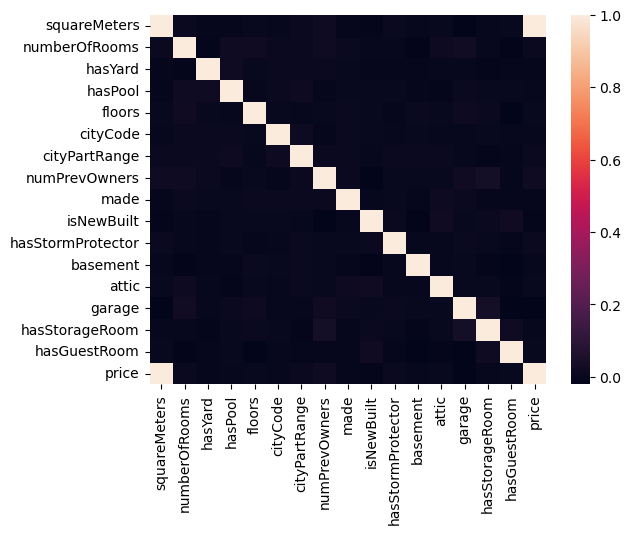

In [13]:
sns.heatmap(df.corr())

In [14]:
# sns.barplot(x='price',y='squareMeters',data=df)

In [15]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [16]:
# sns.kdeplot(y='price',x='squareMeters',data=df,fill=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

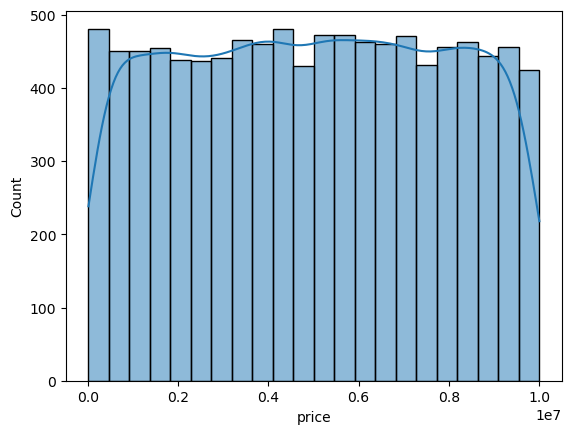

In [17]:
sns.histplot(data=df,x='price',kde=True)

In [18]:
# sns.pairplot(data=df)

In [19]:
X = df.drop('price',axis=1)
y = df['price']

# Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit_transform(X)


In [21]:
# from sklearn.preprocessing import MinMaxScaler
# m_scaler = MinMaxScaler()
# X_m_scaler = m_scaler.fit_transform(X)

## train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X_m_scaler, y, test_size=0.33, random_state=42)

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.33, random_state=42)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
# from sklearn.linear_model import LinearRegression
# LinearRegression().fit(X_train,y_train)


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9999995764395305

In [27]:
model.score(X_test,y_test)

0.9999995764395305

In [28]:
model.score(X_train,y_train)

0.999999559237789

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
model1.score(X_test,y_test)

0.9999961845465865

# SVM

In [31]:
# from sklearn.svm import SVR
# model2 = SVR(kernel="poly")
# model2.fit(X_train,y_train)

In [32]:
# model2.score(X_test,y_test)

In [33]:
# print(bhp_df.location.value_counts().index)
# print("-----------------------------------")
# print(bhp_df.location.value_counts().values)